Here we attempt to load the CO spectrum from the FCRAO survey to plot and analyze (INCOMPLETE)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.io import ascii
import celerite

In [2]:
%matplotlib inline

In [57]:
# Grab the fits file:

from astropy.io import fits

In [239]:
filename = '../OtherDatasets/FCRAO_LBV.NOEB.PATCHED_SMOOTH_9.fits'

l = 104
b = 3

In [240]:
# Let's try to copy Philip's code from IDL:

cube = fits.open(filename)
data = fits.getdata(filename)

# Grab values from header:
nchans = fits.getval(filename, "NAXIS1")   # Number of velocity channels in spectrum.

crpix1=fits.getval(filename,"CRPIX1")  # Velocity axis for this cube (km/s).
crval1=fits.getval(filename,"CRVAL1")
cdelt1=fits.getval(filename,"CDELT1")

crpix2=fits.getval(filename,"CRPIX2")  # Galactic longitude axis (deg).
crval2=fits.getval(filename,"CRVAL2")
cdelt2=fits.getval(filename,"CDELT2")

crpix3=fits.getval(filename,"CRPIX3")  # Galactic latitude axis (deg).
crval3=fits.getval(filename,"CRVAL3")
cdelt3=fits.getval(filename,"CDELT3")

In [241]:
# Define arrays to contain spectrum and velocity:
spectrum = np.zeros(nchans)
vel = np.zeros(nchans)

In [242]:
# Round input b and l:
lpix=np.round(l)
bpix=np.round(b)

In [243]:
# Extract the spectrum from the cube:
spectrum = data[lpix][bpix][:]

In [244]:
# Get velocities:
for i in range(nchans-1):
    vel[i] = (i+1-crpix3)*cdelt3+crval3

vel = vel/1000

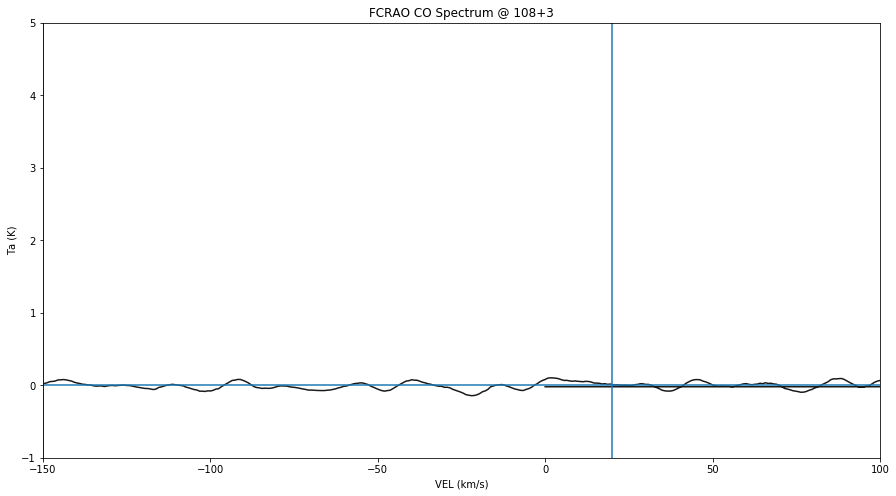

In [245]:
# Plot the data:
fig, ax1 = plt.subplots(1, figsize=(15, 8))

# Plot the HI:
ax1.plot(vel, spectrum, 'k', alpha=0.9, ms=2)
ax1.axhline(0)
ax1.axvline(-150)
ax1.axvline(20)
ax1.set_xlim([-150, 100])
ax1.set_ylim([-1, 5])
ax1.set_title('FCRAO CO Spectrum @ 108+3')
ax1.set_ylabel("Ta (K)")
ax1.set_xlabel("VEL (km/s)");

In [ ]:
#NOTE THIS DIDN'T SEEM TO WORK... Put this in another notebook and forget about it.